In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
Doctor_name = []
Doctor_specialization = []
Doctor_experience = []
Doctor_location = []
Doctor_clinic_name = []
Doctor_hospital = []
Doctor_fee = []

In [3]:
cities = ["Bangalore", "jaipur", "kota"]

In [4]:
for city in cities:
    for i in range(1, 10):
        url = f"https://www.practo.com/{city}/doctors?page={i}"
        r = requests.get(url)
        
        if r.status_code != 200:
            print(f"Failed to retrieve data for {city} page {i}")
            continue
        
        soup = BeautifulSoup(r.text, 'html.parser')
        boxes = soup.find_all('div', class_="info-section")
        
        for box in boxes:
            
            name_div = box.find('div', class_="u-color--primary uv2-spacer--xs-bottom")
            if name_div:
                name_tag = name_div.find('h2', class_="doctor-name")
                if name_tag:
                    Doctor_name.append(name_tag.text.strip())
            
            specialization_tag = box.find('div', class_='u-d-flex').find('span')
            if specialization_tag:
                Doctor_specialization.append(specialization_tag.text.strip())
            
            experience_tag = box.find('div', {'data-qa-id': 'doctor_experience'})
            if experience_tag:
                Doctor_experience.append(experience_tag.text.strip().split()[0])  # Get the number of years
            
            locality_tag = box.find('span', {'data-qa-id': 'practice_locality'})
            city_tag = box.find('span', {'data-qa-id': 'practice_city'})
            if locality_tag and city_tag:
                Doctor_location.append(f"{locality_tag.text.strip()} {city_tag.text.strip()}")
            
            clinic_name_tag = box.find('span', {'data-qa-id': 'doctor_clinic_name'})
            if clinic_name_tag:
                Doctor_clinic_name.append(clinic_name_tag.text.strip())
            
            consultation_fee_tag = box.find('span', {'data-qa-id': 'consultation_fee'})
            if consultation_fee_tag:
                Doctor_fee.append(consultation_fee_tag.text.strip())

In [5]:
data = {
    "Doctor_name" : Doctor_name,
    "Doctor_specialization" : Doctor_specialization,
    "Doctor_experience" : Doctor_experience,
    "Doctor_location" : Doctor_location,
    "Doctor_clinic_name" : Doctor_clinic_name,
    "Doctor_fee" : Doctor_fee
}

In [6]:
df = pd.DataFrame(data)
df.head()

,Doctor_name,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_clinic_name,Doctor_fee
0,Dr. Jnanesha H.C,Dentist,23,"Jayanagar 4 Block, Bangalore",Excel Dental Care,₹300
1,Dr. Sindhu S Kumar,Dentist,16,"Jayanagar 4 Block, Bangalore",Excel Dental Care,₹300
2,Dr. Jonathan Eric Rao,Dentist,17,"Horamavu, Bangalore",Urban Dental Clinic,₹500
3,Dr. Sumanth Shetty,Dentist,26,"Koramangala, Bangalore",Chisel Dental,₹300
4,Dr. Venkatesh M J,Dentist,30,"Indiranagar, Bangalore",All Care Dental Centre - since 1969,₹300


In [7]:
df.shape

(270, 6)

In [8]:
df = df.drop(columns = ["Doctor_name", "Doctor_clinic_name"])
df.head()

,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_fee
0,Dentist,23,"Jayanagar 4 Block, Bangalore",₹300
1,Dentist,16,"Jayanagar 4 Block, Bangalore",₹300
2,Dentist,17,"Horamavu, Bangalore",₹500
3,Dentist,26,"Koramangala, Bangalore",₹300
4,Dentist,30,"Indiranagar, Bangalore",₹300


In [9]:
df.dtypes

Doctor_specialization    object
Doctor_experience        object
Doctor_location          object
Doctor_fee               object
dtype: object

In [10]:
df["Doctor_experience"] = df["Doctor_experience"].astype('int')

In [11]:
df["Doctor_location"] =  df["Doctor_location"].apply(lambda x: x.split(",")[-1].strip())

In [12]:
df["Doctor_fee"] = df["Doctor_fee"].str.replace('₹','')
df["Doctor_fee"] = df["Doctor_fee"].str.replace('Free Consultation','0')
df["Doctor_fee"] = df["Doctor_fee"].astype('int')

In [13]:
df.head()

,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_fee
0,Dentist,23,Bangalore,300
1,Dentist,16,Bangalore,300
2,Dentist,17,Bangalore,500
3,Dentist,26,Bangalore,300
4,Dentist,30,Bangalore,300


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

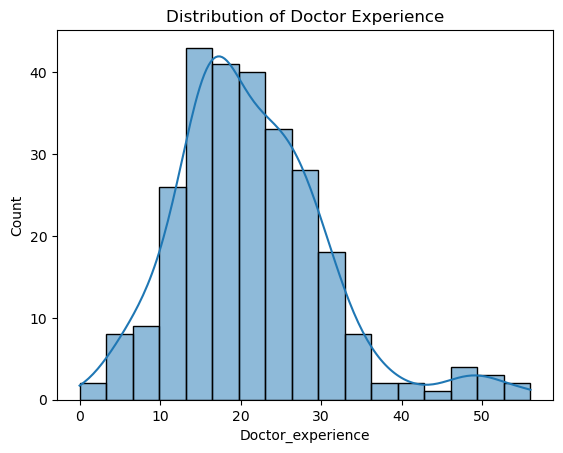

In [15]:
sns.histplot(df['Doctor_experience'], kde=True)
plt.title("Distribution of Doctor Experience")
plt.show()

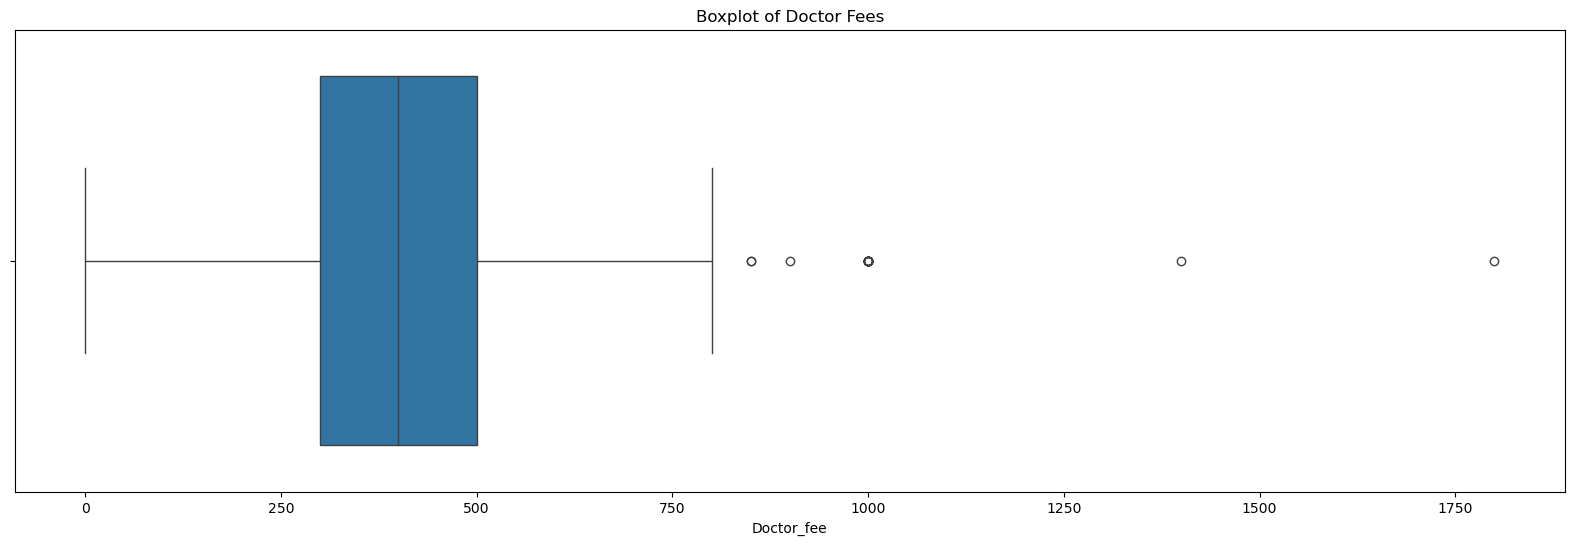

In [16]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['Doctor_fee'])
plt.title("Boxplot of Doctor Fees")
plt.show()

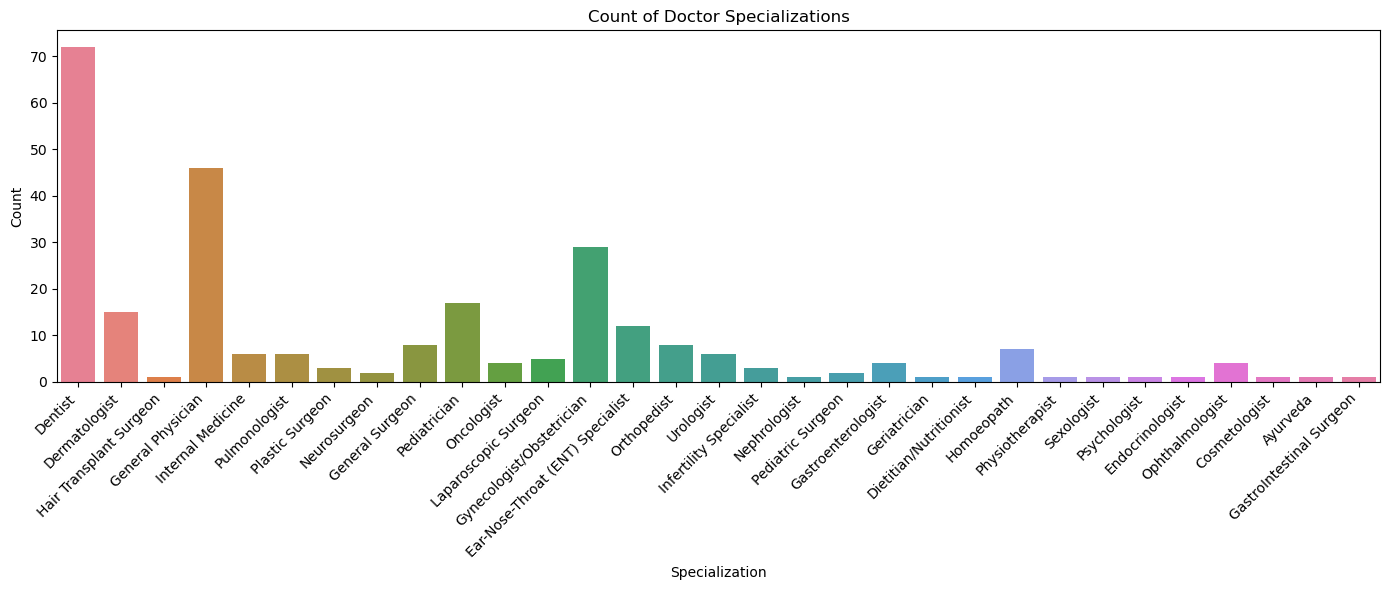

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Doctor_specialization', hue='Doctor_specialization')
plt.title('Count of Doctor Specializations')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

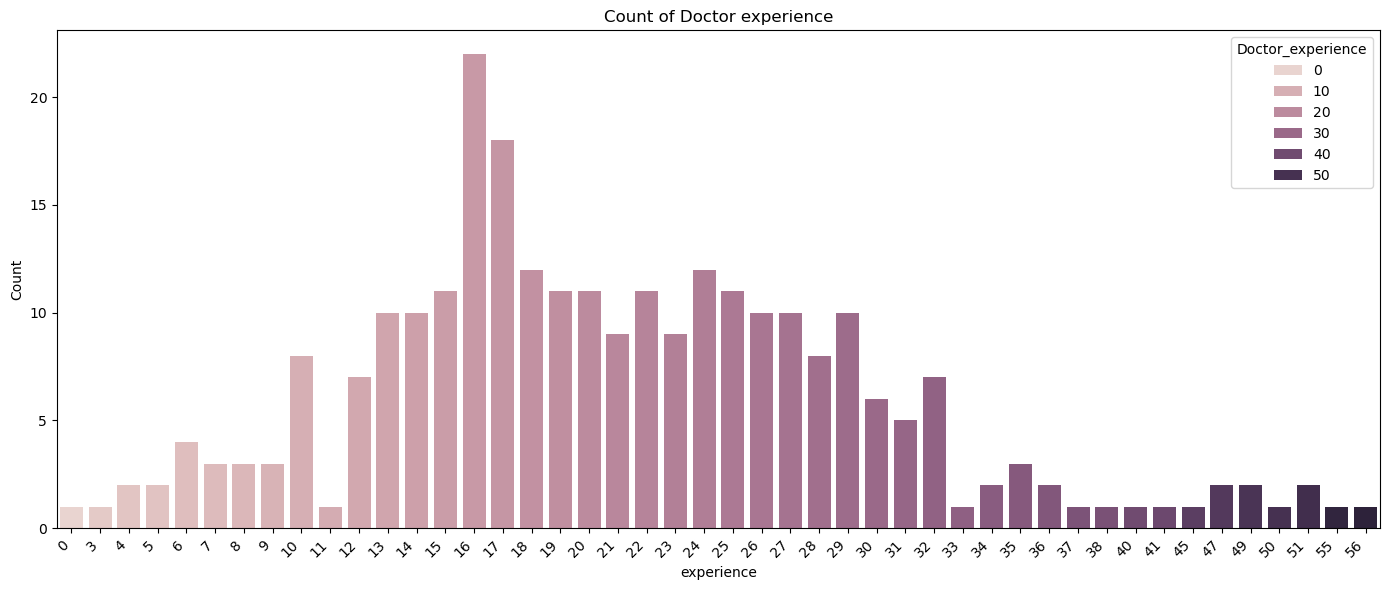

In [18]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Doctor_experience', hue='Doctor_experience')
plt.title('Count of Doctor experience')
plt.xlabel('experience')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

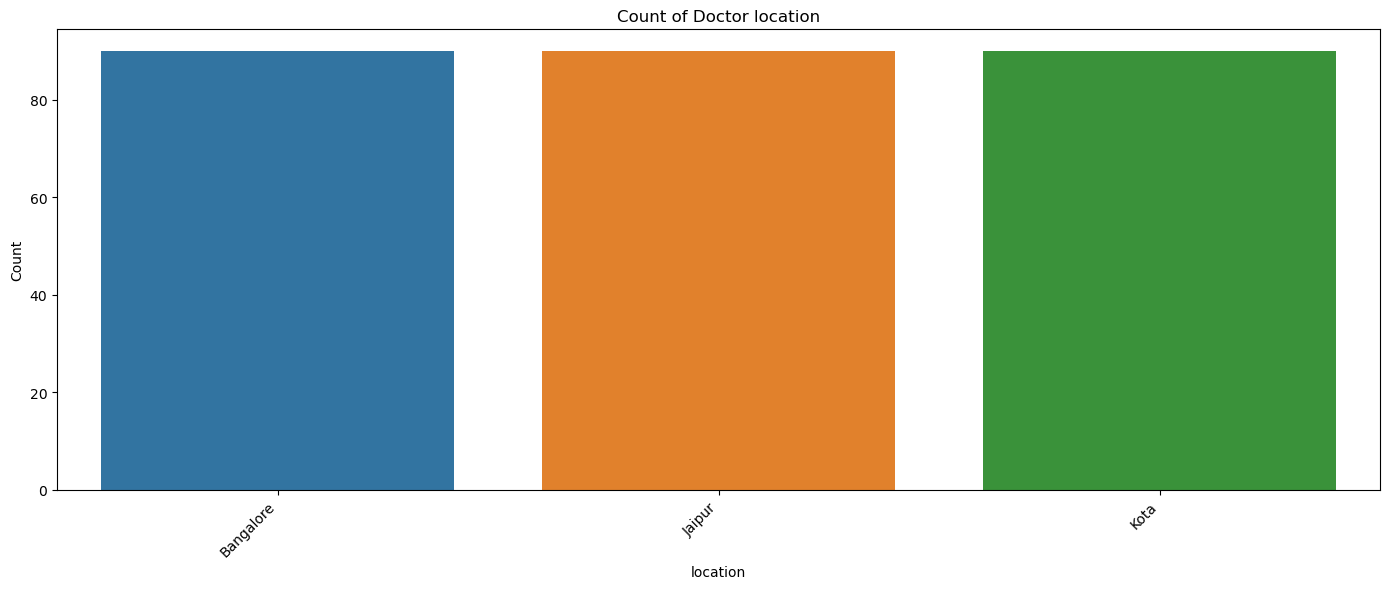

In [19]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Doctor_location', hue='Doctor_location')
plt.title('Count of Doctor location')
plt.xlabel('location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [79]:
df.dtypes

Doctor_specialization    int32
Doctor_experience        int32
Doctor_location          int32
Doctor_fee               int32
dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
df["Doctor_specialization"] = le.fit_transform(df["Doctor_specialization"])
df["Doctor_location"] = le.fit_transform(df["Doctor_location"])

In [81]:
df.head()

,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_fee
0,2,23,0,300
1,2,16,0,300
2,2,17,0,500
3,2,26,0,300
4,2,30,0,300


In [61]:
columns = ["Doctor_specialization", "Doctor_experience", "Doctor_location"]

In [63]:
from sklearn.model_selection import train_test_split

x = df[columns]
y = df["Doctor_fee"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [91]:
lr.fit(x_train, y_train)

LinearRegression()

In [93]:
y_pred = lr.predict(x_test)

In [102]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)

print(r2_score)

0.5992023576266627


In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

random_search = RandomizedSearchCV(lr, param_space, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")

print(f"Best Score: {random_search.best_score_}")

C:\Users\Khemr\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.4523228998098002
